## Evolution of the cyclone intensity (EKE and pmin) of all simulations 

Partially taken from the script by Behrooz Keshtgar "Lorenz Energy Cycle" for the calculation of eddy kinetic energy (EKE)

In [1]:
# Import libraris

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import time

# loading external functions for Lorenz_calculation

import lec   # this python script contains functions for computing: vertical integral, numerical derivative,
             # ZAPE, EAPE, ZKE, EKE

In [2]:
# Dictionary for loading simulations
# test dataset
res = '80km'
res2 = '2km'
simdict = {
    'channel_'+res+'_0001': {'res':res, 'case':'CTL'},    
         }



In [3]:
# Function to load

def load_simulations():
    
    ds_list = []
    
    for sim in list(simdict.keys()):
        
        print('Working on loading data for', sim)
        
        datapath='/work/bb1152/Module_A/A6_CyclEx/sim_data/production/'
        
        path = datapath+sim
        
        ds = xr.open_mfdataset(path+'/remapped_atm3d_latlon/icon-atm3d_PL_reg_con_202101*.nc')
        
        ds_list.append(ds)
        
        del ds

    return ds_list


In [4]:
# Loading simulations

tt=time.process_time()

ds_list_atm3d = load_simulations()

print('Time taken:', time.process_time() - tt,'seconds')

Working on loading data for channel_80km_0001
Time taken: 13.095105661000002 seconds


In [7]:
# select timesteps every 6 hours. Did not find a nicer way to do this.
#for i in range(0,len(ds_list_atm3d)):
for i in range(0,0):
    ds_list_atm3d[i] = ds_list_atm3d[i].isel(time=[0,
        6,
        12,
        18,
        24,
        30,
        36,
        42,
        48,
        54,
        60,
        66,
        72,
        78,
        84,
        90,
        96,
        102,
        108,
        114,
        120,
        126,
        132,
        138,
        144,
        150,
        156,
        162,
        168,
        174,
        180,
        186,
        192,
        198,
        204,
        210,
        216 ])

In [8]:
# set relative time-axis

for i in range(0,len(ds_list_atm3d)):

    ds_list_atm3d[i]["time"] = ds_list_atm3d[i].time - 20210100

In [9]:
# select subdomain without meridional boundaries

latmin = 10
latmax = 80

for i in range(0,len(ds_list_atm3d)):
    ds_list_atm3d[i] = ds_list_atm3d[i].sel(lat=slice(latmin,latmax))

In [10]:
ds_list_atm3d[0]

<xarray.Dataset>
Dimensions:   (time: 37, lon: 51, lat: 70, plev: 100, plev_2: 100, plev_3: 100)
Coordinates:
  * time      (time) float64 1.0 1.25 1.5 1.75 2.0 ... 9.0 9.25 9.5 9.75 10.0
  * lon       (lon) float64 12.5 13.5 14.5 15.5 16.5 ... 59.5 60.5 61.5 62.5
  * lat       (lat) float64 10.5 11.5 12.5 13.5 14.5 ... 76.5 77.5 78.5 79.5
  * plev      (plev) float64 1e+03 2e+03 3e+03 4e+03 ... 9.8e+04 9.9e+04 1e+05
  * plev_2    (plev_2) float64 1e+03 2e+03 3e+03 4e+03 ... 9.8e+04 9.9e+04 1e+05
  * plev_3    (plev_3) float64 1e+03 2e+03 3e+03 4e+03 ... 9.8e+04 9.9e+04 1e+05
Data variables:
    pres      (time, plev_3, lat, lon) float32 dask.array<chunksize=(1, 100, 70, 51), meta=np.ndarray>
    qv        (time, plev_3, lat, lon) float32 dask.array<chunksize=(1, 100, 70, 51), meta=np.ndarray>
    temp      (time, plev_3, lat, lon) float32 dask.array<chunksize=(1, 100, 70, 51), meta=np.ndarray>
    u         (time, plev_3, lat, lon) float32 dask.array<chunksize=(1, 100, 70, 51), meta=np.ndarray>
    v         (time, plev_3, lat, lon) float32 dask.array<chunksize=(1, 100, 70, 51), meta=np.ndarray>
    w         (time, plev_3, lat, lon) float32 dask.array<chunksize=(1, 100, 70, 51), meta=np.ndarray>
    z_ifc     (time, plev_3, lat, lon) float32 dask.array<chunksize=(1, 100, 70, 51), meta=np.ndarray>
    vor       (time, plev_3, lat, lon) float32 dask.array<chunksize=(1, 100, 70, 51), meta=np.ndarray>
    omega     (time, plev_3, lat, lon) float32 dask.array<chunksize=(1, 100, 70, 51), meta=np.ndarray>
    geopot    (time, plev_3, lat, lon) float32 dask.array<chunksize=(1, 100, 70, 51), meta=np.ndarray>
    div       (time, plev_3, lat, lon) float32 dask.array<chunksize=(1, 100, 70, 51), meta=np.ndarray>
    pres_sfc  (time, lat, lon) float32 dask.array<chunksize=(1, 70, 51), meta=np.ndarray>
Attributes:
    CDI:                       Climate Data Interface version 2.0.5 (https://...
    Conventions:               CF-1.6
    source:                    @
    institution:               Max Planck Institute for Meteorology/Deutscher...
    title:                     ICON simulation
    history:                   Fri Jul 15 08:07:45 2022: cdo -P 38 ap2pl,1000...
    references:                see MPIM/DWD publications
    comment:                   Nicole Knopf (b380906) on l40645 (Linux 4.18.0...
    cdo_openmp_thread_number:  38
    CDO:                       Climate Data Operators version 2.0.5 (https://...

In [11]:
# looping through simulations
def lorenz(num):
    print('Working on simulation:', num+1)
    # Loading dimentions and changing to np.array
    time = ds_list_atm3d[num].time.values 
    lev  = ds_list_atm3d[num].plev.values
    lat  = ds_list_atm3d[num].lat.values
    lon  = ds_list_atm3d[num].lon.values

    # lev, lat, lon must be increasing
    T  = ds_list_atm3d[num].temp.values
    u  = ds_list_atm3d[num].u.values
    v  = ds_list_atm3d[num].v.values
    w  = ds_list_atm3d[num].omega.values
    #-------------------------------------------------------------------------------------
    # Creating classes and checking the order of variables

    class expclass():

        def __init__(self,T,u,v,w,time,lev,lat,lon):

            self.T     = np.array(T)     # temperature
            self.u     = np.array(u)
            self.v     = np.array(v)
            self.w     = np.array(w)
            self.time  = np.array(time)
            self.lev   = np.array(lev)
            self.lat   = np.array(lat)
            self.lon   = np.array(lon)
            self.ntime = np.size(time)
            self.nlev  = np.size(lev)
            self.nlat  = np.size(lat)
            self.nlon  = np.size(lon)
            self.zape  = np.full(self.ntime,np.nan,dtype=float)
            self.eape  = np.full(self.ntime,np.nan,dtype=float)
            self.zke   = np.full(self.ntime,np.nan,dtype=float)
            self.eke   = np.full(self.ntime,np.nan,dtype=float)
            self.ekemax= np.full(self.ntime,np.nan,dtype=float)
            if ( (np.shape(self.T)    != (self.ntime,self.nlev,self.nlat,self.nlon)) or  
                 (np.shape(self.u)    != (self.ntime,self.nlev,self.nlat,self.nlon)) or
                 (np.shape(self.v)    != (self.ntime,self.nlev,self.nlat,self.nlon)) or
                 (np.shape(self.w)    != (self.ntime,self.nlev,self.nlat,self.nlon))):
                print(self.T.shape, self.ntime, self.nlev, self.nlat, self.nlon)
                raise ValueError()
             #lev, lat, lon dimensions must be increasing    
            for k in range(self.nlev-1):
                if self.lev[k] > self.lev[k+1]:
                    raise ValueError()
            for k in range(self.nlat-1):
                if self.lat[k] > self.lat[k+1]:
                    print(k, lat[k], lat[k+1])
                    raise ValueError()       
            for k in range(self.nlon-1):
                if self.lon[k] > self.lon[k+1]:
                    raise ValueError()
    #-------------------------------------------------------------------
    # calling fuctions for computation
    exp=expclass(T,u,v,w,time,lev,lat,lon) #(T,u,v,w,d,Q,time,lev,lat,lon)

    for t in range(exp.ntime):
        #print('Working on time step:',t)
        exp.zape[t] = lec.calc_zape(np.nanmean(exp.T[t],axis=2),exp.lev,exp.lat)
        exp.zke [t] = lec.calc_zke (np.nanmean(exp.u[t],axis=2),np.nanmean(exp.v[t],axis=2),exp.lev,exp.lat)
        exp.eape[t] = lec.calc_eape(exp.T[t],exp.lev,exp.lat,exp.lon)
        exp.eke [t], exp.ekemax[t]  = lec.calc_eke (exp.u[t],exp.v[t],exp.lev,exp.lat,exp.lon)

    # Putting all derived vars and return them
    #list_var = [exp.zape,exp.zke,exp.eape,exp.eke]
    return(exp)

In [12]:
ds_lec_rad = []
for i in range(0,len(ds_list_atm3d)):
    rad=lorenz(i)
    ds_lec_rad.append(rad)

Working on simulation: 1


/tmp/ipykernel_1045791/3729600734.py:62: RuntimeWarning: Mean of empty slice
  exp.zape[t] = lec.calc_zape(np.nanmean(exp.T[t],axis=2),exp.lev,exp.lat)
/tmp/ipykernel_1045791/3729600734.py:63: RuntimeWarning: Mean of empty slice
  exp.zke [t] = lec.calc_zke (np.nanmean(exp.u[t],axis=2),np.nanmean(exp.v[t],axis=2),exp.lev,exp.lat)
/home/b/b382037/icon-climxtreme/FF_figures_manuscript/lec.py:106: RuntimeWarning: Mean of empty slice
  Tzm = np.nanmean(T,axis=2)
/home/b/b382037/icon-climxtreme/FF_figures_manuscript/lec.py:197: RuntimeWarning: Mean of empty slice
  uzm = np.nanmean(u,axis=2)
/home/b/b382037/icon-climxtreme/FF_figures_manuscript/lec.py:198: RuntimeWarning: Mean of empty slice
  vzm = np.nanmean(v,axis=2)


0 channel_80km_0001


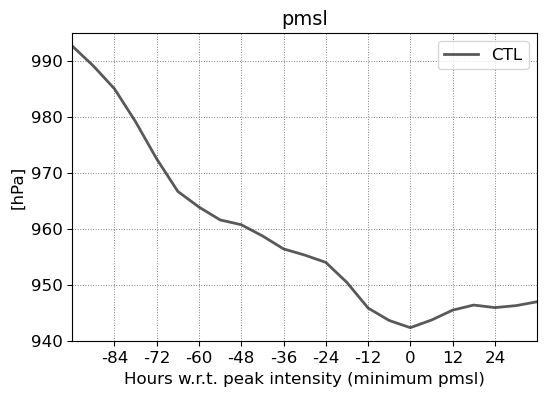

In [37]:
colors={1:'#303030',2:'#FFC125',3:'#4984b8',4:'crimson',5:'yellowgreen',6:'mediumpurple'}

import pandas as pd
#####################################################
# Minimum pressure 
#####################################################
plt.rcParams['savefig.facecolor']='white'
fig = plt.figure(figsize=(6, 4))
#colors={1:'k',2:'orange',3:'mediumseagreen',4:'crimson',5:'violet',6:'royalblue'}
fs=12

#Cyclone Track
for count, sim in enumerate(list(simdict.keys())):
    print (count, sim)
    path_track = '/work/bb1152/Module_A/A6_CyclEx/pp_data/cyclone_tracks/'
    df_track = pd.read_csv(path_track+'Track_for_'+sim+'_6hrly_1x1latlon.csv')
    
    idmin= np.argmin(df_track['pmin'])
    #print ( idmax, np.min(df_track['pmin']) )
    #print ( df_track['time'][idmin]+1)
    if count < 6: 
        plt.plot(df_track['time']+1, df_track['pmin'],   color=colors[count+1], linewidth=2, label= simdict['channel_80km_000'+ str(count+1)]['case'],alpha=0.8) 
    else:
        plt.plot(df_track['time']+1, df_track['pmin'],   color=colors[count-5], linestyle='dotted', linewidth=2.5)
      
   
plt.xticks(np.arange(1,11,1))
plt.legend(fontsize=fs)
plt.ylim(940, 995)
#plt.ylim(938, 1004)
plt.xlim(3.5, 9)
plt.xticks([4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5], [-84, -72, -60, -48, -36, -24, -12, 0, 12, 24], rotation='horizontal')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Hours w.r.t. peak intensity (minimum pmsl)',fontsize=12)
plt.ylabel('[hPa]',fontsize=12)
plt.grid(color='gray', linestyle=':', linewidth=0.7)
plt.title('pmsl', fontsize=14)
fig.savefig('R3_Centralpressure_CTL_80km.png', bbox_inches='tight',dpi=100)


0 channel_80km_0001


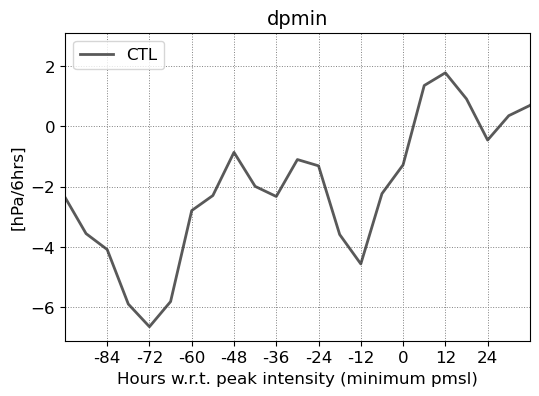

In [39]:
colors={1:'#303030',2:'#FFC125',3:'#4984b8',4:'crimson',5:'yellowgreen',6:'mediumpurple'}

import pandas as pd
#####################################################
# Minimum pressure 
#####################################################
plt.rcParams['savefig.facecolor']='white'
fig = plt.figure(figsize=(6, 4))
#colors={1:'k',2:'orange',3:'mediumseagreen',4:'crimson',5:'violet',6:'royalblue'}
fs=12

#Cyclone Track
for count, sim in enumerate(list(simdict.keys())):
    print (count, sim)
    path_track = '/work/bb1152/Module_A/A6_CyclEx/pp_data/cyclone_tracks/'
    df_track = pd.read_csv(path_track+'Track_for_'+sim+'_6hrly_1x1latlon.csv')
    
    idmin= np.argmin(df_track['pmin'])
    #print ( idmax, np.min(df_track['pmin']) )
    #print ( df_track['time'][idmin]+1)
    if count < 6: 
        plt.plot(df_track['time']+1, df_track['pmin'].diff(),   color=colors[count+1], linewidth=2, label= simdict['channel_80km_000'+ str(count+1)]['case'],alpha=0.8) 
    else:
        plt.plot(df_track['time']+1, df_track['pmin'].diff(),   color=colors[count-5], linestyle='dotted', linewidth=2.5)
      
   
plt.xticks(np.arange(1,11,1))
plt.legend(fontsize=fs,loc='upper left')
#plt.ylim(940, 995)
#plt.ylim(938, 1004)
plt.xlim(3.5, 9)
plt.xticks([4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5], [-84, -72, -60, -48, -36, -24, -12, 0, 12, 24], rotation='horizontal')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Hours w.r.t. peak intensity (minimum pmsl)',fontsize=12)
plt.ylabel('[hPa/6hrs]',fontsize=12)
plt.grid(color='gray', linestyle=':', linewidth=0.7)
plt.title('dpmin', fontsize=14)
fig.savefig('R3_Centralpressurerate_CTL_80km.png', bbox_inches='tight',dpi=100)
